In [1]:
import pandas as pd
df = pd.read_csv('../../preprocessing/output_results/hotels_preprocessed_all.csv')
df

,name,location,price,date,stars,km_from_center,num_external_reviews,booking_user_ratings,avg_user_ratings,airport_taxi,travel_sustainable_level,has_free_cancelation,town_location,price_category,month
0,"The Pavilions Amsterdam, The Toren","Amsterdam City Center, Amsterdam",233.450157,2024-02-01,4,0.6,1044,5,8.900000,0,4,0,Amsterdam,High,February
1,Sonder Park House,"Oud Zuid, Amsterdam",144.615141,2024-02-01,4,1.7,3190,1,7.500000,0,0,1,Amsterdam,High,February
2,Hotel Jansen Amsterdam Bajeskwartier,"Oost, Amsterdam",85.679184,2024-02-01,0,4.2,1155,2,8.300000,0,3,1,Amsterdam,Medium,February
3,AmicitiA,"Amsterdam City Center, Amsterdam",30.061730,2024-02-01,0,1.2,1820,1,7.100000,0,0,1,Amsterdam,Low,February
4,Hotel Washington,"Oud Zuid, Amsterdam",50.102884,2024-02-01,2,2.1,2205,1,7.300000,0,0,0,Amsterdam,Low,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51287,Schöne 2 1/2 Zimmer Wohnung im Herzen von Dort...,"Dortmund City Centre, Dortmund",190.748835,2025-01-31,0,0.6,11,5,8.600000,0,0,0,Dortmund,High,January
51288,schlafgut24,Dortmund,119.254623,2025-01-31,0,10.9,16,4,9.600000,0,2,0,Dortmund,Medium,January
51289,3 Zimmer Wohnung in Dortmund,Dortmund,190.390958,2025-01-31,0,3.0,3,2,8.000000,0,0,0,Dortmund,High,January
51290,"Wohnung Nähe Uni,Stadion",Dortmund,84.768223,2025-01-31,0,5.0,0,0,7.789035,0,0,0,Dortmund,Medium,January


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score


label_encoder = LabelEncoder()
df['has_free_cancelation_encoded'] = label_encoder.fit_transform(df['has_free_cancelation'])

X_classification = df[['price', 'stars', 'km_from_center', 'num_external_reviews', 'booking_user_ratings', 'avg_user_ratings']]
y_classification = df['has_free_cancelation_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
predictions_classification = classifier.predict(X_test)
accuracy_classification = accuracy_score(y_test, predictions_classification)
print(f'Binary Classification Accuracy: {accuracy_classification}')

Binary Classification Accuracy: 0.9812847256067843


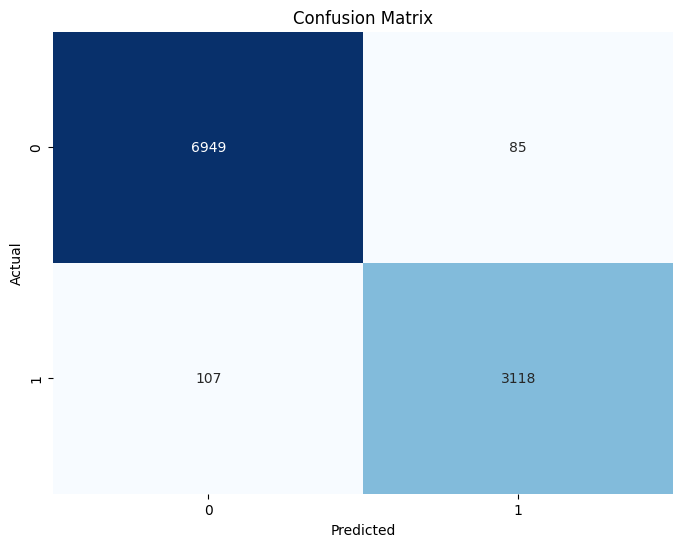

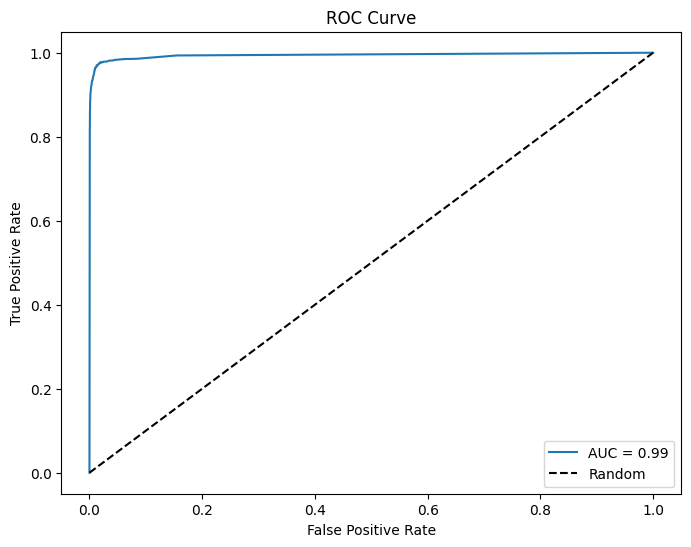

In [4]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_classification)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [5]:
X_classification = df[['price', 'stars', 'km_from_center', 'num_external_reviews', 'booking_user_ratings', 'avg_user_ratings']]
y_classification = df['travel_sustainable_level']

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
predictions_classification = classifier.predict(X_test)

accuracy_classification = accuracy_score(y_test, predictions_classification)
classification_report_result = classification_report(y_test, predictions_classification)

print(f'Multiclass Classification Accuracy: {accuracy_classification}')
print('\nClassification Report:')
print(classification_report_result)

Multiclass Classification Accuracy: 0.997953016863242

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2663
           1       1.00      1.00      1.00      2794
           2       1.00      1.00      1.00      1944
           3       1.00      1.00      1.00       911
           4       1.00      1.00      1.00      1947

    accuracy                           1.00     10259
   macro avg       1.00      1.00      1.00     10259
weighted avg       1.00      1.00      1.00     10259



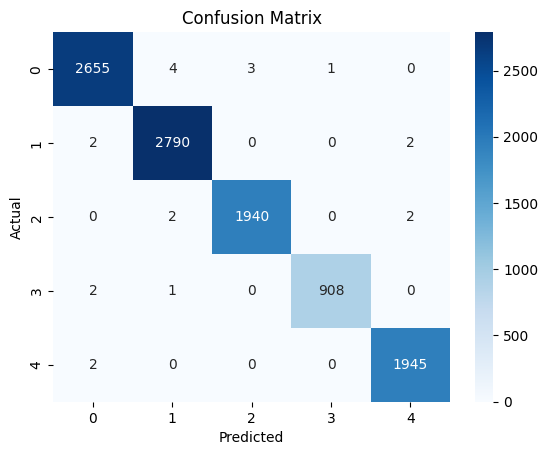

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

unique_classes = np.unique(y_classification)

cm = confusion_matrix(y_test, predictions_classification)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


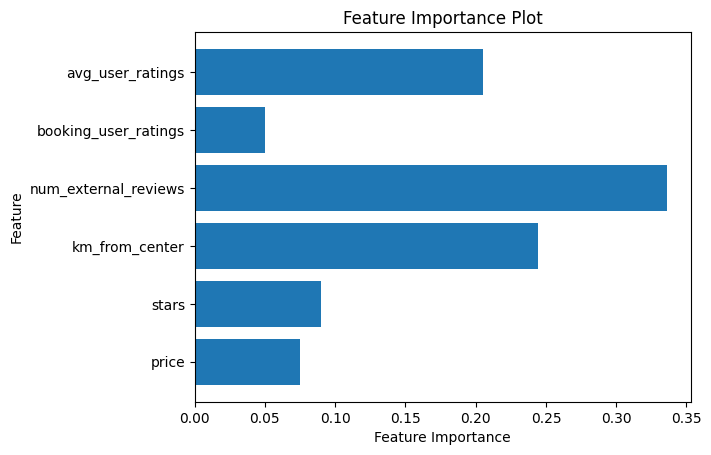

In [25]:
feature_importance = classifier.feature_importances_
feature_names = X_classification.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
